Проект 2_Исследование надёжности заёмщиков


<h2> Описание проекта</h2>

**Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.'
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.**

Описание данных:
* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

## Изучение полученных данных <a name="Изучение полученных данных"></a> 




In [1]:
import pandas as pd
import numpy as np
import re

import seaborn as sns

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [3]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


*Всего в датасете 21525 строк, в столбцах **"days_employed", "total_income"** 19351, что говорит, о том, что часть данных отсуствует. Также в данных столбцах тип данных float64, что не является справедлвым для **"days_employed"** так как данные этого столбца в днях, тип  данных должен быть целочисленным, т.е int64, в столбце **"total_income"** также данные лучше оставить целыми числами.*

*В **"days_employed"** присутствуют отрицательные значения и неестественно большие значения для стажа в днях, данную информацию нужно перепроверить.*

*В **"education"** также значения повторяются в зависимости от написания, присутствуют заглавные буквы или полностью строчные, например: Среднее, среднее. Информацию внутри столбца **"education"** нужно поправить.* 

*В столбце **"purpose"** цели повторяются, например покупка автомобиля или свадьба, встречаются несколько раз, данные категории нужно будет привести к единому варианту, возможно укрупнить.*



## Предобработка данных ##

### Работа с пропусками

In [5]:
data.isna().sum() #работа с пропусками

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [6]:
data.isna().mean()


children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

*В таблице пропущены значения в столбцах **"days_employed " и "total_income"**. Что составляет 10% от общих данных. *Отсутствие стажа может говорить об ошибке имеющей последствия человеческого фактора, на большинство потребительских кредитов банками чаще всего стаж и данные по ежемесячному доходу, могут не запрашиваться, подтверждающие документы также могут не заправшиваться. Наличие пустых строк в ежемесячном доходе также может говорить о нахождении клиента в декретном отпуске.
Медианное значение показывает справедливое распределение,при наличии выдающихся значений (как например в строках  0 и 21524), поэтому пустые строки заполним медианным значением*

In [7]:
total_income_median = data['total_income'].median()
print(total_income_median)

145017.93753253992


In [8]:
data['total_income'] = data['total_income'].fillna(value = total_income_median)

*Проверим подставились ли медианные значения.* 

In [9]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

### Проверка и приведение к единому формату значений `dob_years`, `days_employed`

*Отсортируем список по столбцу dob_years чтобы понимать возрастной диапазон*



In [10]:
data.sort_values(by = 'dob_years',ascending=False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
8880,0,-1678.969771,75,среднее,1,вдовец / вдова,2,F,госслужащий,0,153282.648133,заняться образованием
4895,0,341528.126150,74,высшее,0,женат / замужем,0,F,пенсионер,0,134935.354225,покупка своего жилья
2557,0,372861.103965,74,среднее,1,женат / замужем,0,F,пенсионер,0,42927.300898,автомобили
3460,0,344623.836105,74,среднее,1,женат / замужем,0,M,пенсионер,0,54754.745517,операции со своей недвижимостью
12317,0,-1729.632531,74,среднее,1,женат / замужем,0,M,компаньон,0,124830.079638,покупка жилой недвижимости
...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,397856.565013,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
8672,0,-2442.763520,0,среднее,1,Не женат / не замужем,4,M,сотрудник,0,216923.489903,сделка с подержанным автомобилем
2469,0,-794.876230,0,среднее,1,гражданский брак,1,F,сотрудник,0,95967.700317,сыграть свадьбу
1890,0,NaN,0,высшее,0,Не женат / не замужем,4,F,сотрудник,0,145017.937533,жилье


*есть нулевые значения нужно заполнить их медианными значениями, поскольку, нулевых значений возраста быть не может.*

In [11]:
dob_years_median = data['dob_years'].median()
print(dob_years_median)
data.loc[data['dob_years'] ==0, 'dob_years'] = dob_years_median
data.loc[1890]
#проверка заполняемости строк, которые были нулевые

42.0


children                                0
days_employed                         NaN
dob_years                              42
education                          высшее
education_id                            0
family_status       Не женат / не замужем
family_status_id                        4
gender                                  F
income_type                     сотрудник
debt                                    0
total_income                145017.937533
purpose                             жилье
Name: 1890, dtype: object

In [12]:
dob_years_max = data['dob_years'].max()
print(dob_years_max)
dob_years_min = data['dob_years'].min()
print(dob_years_min)

75
19


*Проверю сначала какие максимальные и минимальные значения есть в days_employed* 

In [13]:
print(data['days_employed'].max())
print(data['days_employed'].min())

401755.40047533
-18388.949900568383


*Избавимся от минусов и заполним пропуски медианным значением*

In [14]:
data['days_employed'] = data['days_employed'].apply(abs)
days_employed_median = data['days_employed'].median()
print(days_employed_median)
data['days_employed'] = data['days_employed'].fillna(value = days_employed_median)

2194.220566878695


Расчитаем стаж, так если бы пользователь начал бы работьать с 16 лет data['dob_years']-16)*365) и сравним значения, количество дней трудоустройства, которые приведены в часах приведем к дням.

In [15]:
data.loc[data['days_employed'] > ((data['dob_years']-16)*365), 'days_employed'] = data.loc[data['days_employed'] > ((data['dob_years']-16)*365), 'days_employed'] / 24
# max & min для проверки на адекватность выдаваемых значений
print(data['days_employed'].max()) 
print(data['days_employed'].min())
data.sort_values(by = 'dob_years',ascending=False)

16739.80835313875
24.14163324048118


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
8880,0,1678.969771,75,среднее,1,вдовец / вдова,2,F,госслужащий,0,153282.648133,заняться образованием
12317,0,1729.632531,74,среднее,1,женат / замужем,0,M,компаньон,0,124830.079638,покупка жилой недвижимости
11532,0,6682.867814,74,среднее,1,гражданский брак,1,F,сотрудник,0,98945.906177,сыграть свадьбу
4895,0,14230.338590,74,высшее,0,женат / замужем,0,F,пенсионер,0,134935.354225,покупка своего жилья
3460,0,14359.326504,74,среднее,1,женат / замужем,0,M,пенсионер,0,54754.745517,операции со своей недвижимостью
...,...,...,...,...,...,...,...,...,...,...,...,...
20230,0,509.969922,19,неоконченное высшее,2,Не женат / не замужем,4,F,госслужащий,0,75787.415536,покупка коммерческой недвижимости
9218,0,322.024011,19,среднее,1,гражданский брак,1,F,компаньон,0,103676.482282,сыграть свадьбу
10235,0,793.358581,19,среднее,1,женат / замужем,0,F,сотрудник,0,131308.777259,ремонт жилью
4052,0,91.425857,19,среднее,1,гражданский брак,1,M,сотрудник,0,145017.937533,на проведение свадьбы


### Обработка столбцов `gender`,`family_status`, `children`


*Проверить столбцы 'family_status_id', 'children', 'gender' на уникальные значения*

In [16]:
print ('Уникальные значения gender:', data['gender'].unique())
display(data[data['gender'] == 'XNA'])


Уникальные значения gender: ['F' 'M' 'XNA']


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


*Всего одна строка не повлияет на результаты исследования, оставляю для дальнейшего исследования вместе с этой строкой.*

In [17]:
data['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [18]:
print(data['children'].unique())
data['children'] = data['children'].apply(abs)


[ 1  0  3  2 -1  4 20  5]


In [19]:
mistakes_correction = 2 #замена значения 20 в children поскольку вероятнее всего была допушщена ошибка
data.loc[data['children'] == 20, 'children'] = mistakes_correction
data.sort_values(by = 'children',ascending=False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4397,5,3248.839837,36,среднее,1,женат / замужем,0,F,компаньон,0,168460.926969,операции с недвижимостью
21156,5,1690.018117,59,среднее,1,женат / замужем,0,M,сотрудник,0,269068.348794,операции со своей недвижимостью
15916,5,2286.262752,37,среднее,1,женат / замужем,0,F,сотрудник,0,256698.352846,покупка недвижимости
20452,5,268.425464,38,НАЧАЛЬНОЕ,3,женат / замужем,0,F,сотрудник,0,212545.366151,заняться высшим образованием
7866,5,773.124856,36,среднее,1,женат / замужем,0,F,сотрудник,0,48772.896208,операции с жильем
...,...,...,...,...,...,...,...,...,...,...,...,...
11578,0,15441.148856,52,среднее,1,женат / замужем,0,F,пенсионер,0,147982.225473,строительство недвижимости
4905,0,3190.008383,32,высшее,0,Не женат / не замужем,4,M,госслужащий,1,113028.844651,операции со своей недвижимостью
11580,0,938.919009,28,высшее,0,женат / замужем,0,F,госслужащий,1,79365.838130,покупка коммерческой недвижимости
11581,0,1643.273215,34,среднее,1,женат / замужем,0,M,сотрудник,0,329182.042229,покупка жилья


In [20]:
data['total_income'] = data['total_income'].astype('int')
data['days_employed'] = data['days_employed'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   days_employed     21525 non-null  int32 
 2   dob_years         21525 non-null  int64 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int64 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int64 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int64 
 10  total_income      21525 non-null  int32 
 11  purpose           21525 non-null  object
dtypes: int32(2), int64(5), object(5)
memory usage: 1.8+ MB


### Работа с дубликатами

- удаление дубликатов, если они есть, 
- работа с неявными дубликатами, 


In [21]:
duplicated_data = data[data.duplicated()].head()
display(duplicated_data)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,2194,41,среднее,1,женат / замужем,0,F,сотрудник,0,145017,покупка жилья для семьи
4182,1,2194,34,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,145017,свадьба
4851,0,2194,60,среднее,1,гражданский брак,1,F,пенсионер,0,145017,свадьба
5557,0,2194,58,среднее,1,гражданский брак,1,F,пенсионер,0,145017,сыграть свадьбу
7808,0,2194,57,среднее,1,гражданский брак,1,F,пенсионер,0,145017,на проведение свадьбы


In [22]:
data.duplicated().sum()

55

In [23]:
data = data.drop_duplicates().reset_index(drop=True)

In [24]:
print(data['education'].value_counts())

среднее                13704
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64


*По факту уникальных значений, всего 5: начальное, среднее,высшее, неоконченное высшее,ученая степень. Их нужно заменить на все строчные и перепроверить результат тем же способом*

In [25]:
data['education']= data['education'].str.lower()
print(data['education'].value_counts())

среднее                15187
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64


*С family_status все коректно, замен не требуется*

In [26]:
print(data['family_status'].value_counts())

женат / замужем          12344
гражданский брак          4162
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64


#### Преобразоование категориальных данных и приведение их к единому формату


**Создадим отдельный столбец `purpose_category`, который будет хранить новые категории. Для обработки категорий, напишем функцию, которая приведет похожие категории к единому формату. Новые категории:**

- 'операции с автомобилем',
- 'операции с недвижимостью',
- 'проведение свадьбы',
- 'получение образования'.

In [27]:
print(data['purpose'].value_counts())

свадьба                                   793
на проведение свадьбы                     772
сыграть свадьбу                           769
операции с недвижимостью                  675
покупка коммерческой недвижимости         662
покупка жилья для сдачи                   652
операции с жильем                         652
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          625
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      


**Повторы могли возникнуть из-за объединени двух систем, а также если данные в системе заполняются вручную/ в онлайн форме/анкете для клиента/сотрудника нет списка из которого он может выбирать. Для удаления дубликатов первоначально выбран способ drop_duplicates()  c исп-ем метода reset_index() для перезаписи индексов таблицы** 

In [28]:
def get_new_purpose(cell):
    purpose_dict = {'операции с автомобилем': ['автомобил'],
                     'операции с недвижимостью': ['недвижимост', 'жиль'],
                     'проведение свадьбы': ['свадьб'],
                     'получение образования': ['образов']}
    for category, synonyms in purpose_dict.items():
        for r in synonyms:
            if cell.find(r) >= 0:
                return category
    return None


In [29]:
data ['purpose_category'] = data['purpose'].apply(get_new_purpose)
data[['purpose','purpose_category']]

,purpose,purpose_category
0,покупка жилья,операции с недвижимостью
1,приобретение автомобиля,операции с автомобилем
2,покупка жилья,операции с недвижимостью
3,дополнительное образование,получение образования
4,сыграть свадьбу,проведение свадьбы
...,...,...
21465,операции с жильем,операции с недвижимостью
21466,сделка с автомобилем,операции с автомобилем
21467,недвижимость,операции с недвижимостью
21468,на покупку своего автомобиля,операции с автомобилем


In [30]:
print(data['purpose_category'].value_counts().reset_index())

                      index  purpose_category
0  операции с недвижимостью             10814
1    операции с автомобилем              4308
2     получение образования              4014
3        проведение свадьбы              2334


Text(0.5, 1.0, 'Цели кредитования')

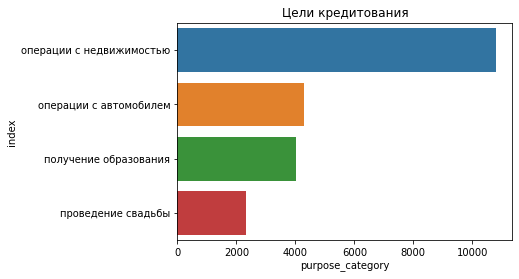

In [31]:
sns.barplot(  x = 'purpose_category', y = 'index', data = data['purpose_category'].value_counts().reset_index()).set_title('Цели кредитования')

*Чаще всего, согласно нашей выгрузке, кредиты берутся на операции с недвижимостью, операции с автомобилем и получение образования распределяются примерно поровну, а также на проведение свадьбы*

In [32]:
print(data['income_type'].value_counts())

сотрудник          11090
компаньон           5080
пенсионер           3837
госслужащий         1457
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64


In [33]:
print(data['debt'].value_counts())

0    19729
1     1741
Name: debt, dtype: int64


*Всего лишь 1741 имели задолженности по возврату кредитов, что не так много.*

*Создадим два новых фрейма:*
* Образование, в который войдут столбцы `education_id` и `education`
* Семейное положение, в который войдут столбцы `family_status_id` и `family_status`

*Новые датафреймы — будут выступать в роли "словаря", к которым  можно будет обратиться по идентификатору.*

In [34]:
data_edu = data[['education_id','education']]
display(data_edu.head())

,education_id,education
0,0,высшее
1,1,среднее
2,1,среднее
3,1,среднее
4,1,среднее


In [35]:
data_fam = data[['family_status_id','family_status']]
display(data_fam)

,family_status_id,family_status
0,0,женат / замужем
1,0,женат / замужем
2,0,женат / замужем
3,0,женат / замужем
4,1,гражданский брак
...,...,...
21465,1,гражданский брак
21466,0,женат / замужем
21467,1,гражданский брак
21468,0,женат / замужем


In [36]:
data = data.drop(['education', 'family_status'], axis=1)
display(data.head())

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,операции с недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,операции с автомобилем
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,операции с недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,получение образования
4,0,14177,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,проведение свадьбы


### Категоризация по доходу



*Создадим столбец `total_income_category` с категориями по доходам:*
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.

*Например, кредитополучателю с доходом 25000 нужно назначить категорию 'E', а клиенту, получающему 235000, — 'B'.*

*Для начала пишу ф-ю, которая будет делить доход из total_income на категории*

In [37]:
def score(income):
    if income < 30000:
        return 'E'
    if 30001 <= income <= 50000:
        return 'D'
    if 50001 <= income <= 200000:
        return 'C'
    if 200001 <= income <= 1000000:
        return 'B'
     
    return 'A'


In [38]:

data['total_income_category'] = data['total_income'].apply(score)
display(data.head())

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,операции с недвижимостью,B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,операции с автомобилем,C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,операции с недвижимостью,C
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,получение образования,B
4,0,14177,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,проведение свадьбы,C


Text(0.5, 1.0, 'Количество клиентов в категориальных группах')

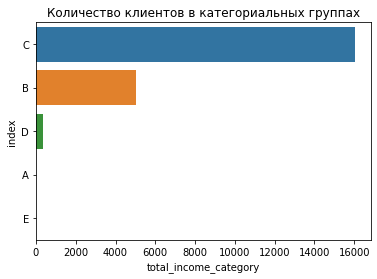

In [39]:
sns.barplot(  x = 'total_income_category', y = 'index', data = data['total_income_category'].value_counts().reset_index()).set_title('Количество клиентов в категориальных группах')

*Превалирующее большинство это клиенты группы С с доходами от 50000 до 200000, следующие клиенты группы В с доходами в диапазоне от 200000 до 1 млн, за ними следуют клиенты группы D, таких мало, с доходом от 30000 до 50000*

## Исследование данных

### Изучение  зависимости между количеством детей и возвратом кредита в срок


In [40]:
pivot_children = data.pivot_table (index = ['children'], values = 'debt', aggfunc = ['sum','count','mean'])
pivot_children.columns = ['debt','total','share']
display(pivot_children.sort_values(by = ['total'], ascending = False))

,debt,total,share
children,,,
0,1063,14106,0.075358
1,445,4856,0.091639
2,202,2128,0.094925
3,27,330,0.081818
4,4,41,0.097561
5,0,9,0.000000


*Зависимость между количеством детей и возвратом кредита в срок существует. Доля повышвется с появлением детей в семье и начинает расти, но в семьях с тремя детьми доля уменьшается незначительно, и составляет 8,1%, т.е просрочки в семьях с 3 детьми менее вероятны, в сравнении с наличием одного или четырех детей в семье. Также нужно отметить, что в семьях с 5 детьми, возврат в срок осуществляется чаще, но данных по не так много, чтобы точно утверждать это. Также можно предположить, что семьеям, в которых от 4х детей могут чаще отказывать в предоставлении кредита.*

### Изучение зависимости между семейным положением и возвратом кредита в срок


*Поскольку ранее мы обновляли data удаляя 'family_status' будем оъединять для вывода сводной таблицы данные из data_fam, где хранится срез 'family_status' и 'family_status_id'. Итоговую сводную таблицу соединять буду методом merge()*

In [41]:

pivot_family = data.pivot_table(index = ['family_status_id'], values = 'debt', aggfunc =['sum','mean'])
pivot_family.columns = ['debt', 'share']
data_fam = data_fam.drop_duplicates()
pivot_family = data_fam.merge(pivot_family, on='family_status_id')
display(pivot_family.sort_values(by = ['family_status'], ascending = False))

,family_status_id,family_status,debt,share
0,0,женат / замужем,931,0.075421
1,1,гражданский брак,388,0.093224
2,2,вдовец / вдова,63,0.065693
3,3,в разводе,85,0.071130
4,4,Не женат / не замужем,274,0.097509


Видим, что основными группами которые допускают задержки в своевременной оплате кредитов являются группы **женат / замужем , гражданский брак, Не женат / не замужем** тогда как в категориях  **в разводе, вдовец / вдова** наименьшее количество допущенных просрочек. В данной ситуации также можно говорить о наличии связи семейного статуса и своевременности возврата кредита*

### Изучение зависимости  между уровнем дохода и возвратом кредита в срок

In [42]:
pivot_income = data.pivot_table (index = ['total_income_category'], values = 'debt', aggfunc = ['sum','count','mean'])
pivot_income.columns = ['debt','total','share']
display(pivot_income.sort_values(by = ['total'], ascending = False))

,debt,total,share
total_income_category,,,
C,1360,16032,0.084830
B,356,5041,0.070621
D,21,350,0.060000
A,2,25,0.080000
E,2,22,0.090909


*Категориям были присвоены в соответствии с следующим уровнем дохода:*
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 и выше — 'A'.

*С уровнем дохода **D** от 30 001 - 50 000 доля тех кто не вернул кредит в срок самая наименьшая 6,0%, тогда как результаты между остальными категориями распределяются довольно необычно. Чаще всего кредиты не возвращаются своевременно в катериях  **E**(0-30 000) 0,9% и **С** (50 001 -200 000) 0,84%. На основании полученных данных сложно судить о прямой зависимости заработной платы на своевременный возврат кредита. Вероятнее по причине отсутсвия части значений и внесенных коррректировок медианной заработной платы, попробовала бы запросить данные в ячейки которые были пустыми.Полагаю, что в данной ситуации такое распределение имеет смысл если смотреть в зависимости от кол-ва детей на своевременность возврата кредита*

### Изучение влияния  целей кредита  на его возврат в срок

In [43]:
pivot_purpose = data.pivot_table (index = ['purpose_category'], values = 'debt', aggfunc = ['sum','count','mean'])
pivot_purpose.columns = ['debt','total','share']
display(pivot_purpose.sort_values(by = ['total'], ascending = False))

,debt,total,share
purpose_category,,,
операции с недвижимостью,782,10814,0.072314
операции с автомобилем,403,4308,0.093547
получение образования,370,4014,0.092177
проведение свадьбы,186,2334,0.079692


*Категории **операции с автомобилем**  и **получение образования** показывают наибольшую долю в своевременном возврате средств в срок 9,35% и 9,23% соотвественно.*

## Выводы

*Итоги исследования показывают связь между своеврменностью возврата кредита, с показателями:*
- **Количества детей**

*Доля наличия задолженности по кредиту с появлением детей в семье растет, но при этом в семьях с тремя детьми она незначительно падает, что говорит о надежности замещиков с 3 детьми в сравнении с семьями с 1-2 детьми.* 

- **Семейный статус**

*Также показывает, что категории **женат / замужем , гражданский брак, Не женат / не замужем** говорят о меньшей надежности заемщика, так как говорит о наличии допущенных просрочек по кредиту, в сравнении с категориями **в разводе, вдовец / вдова** по которым результаты исследования показывают наименьшую долю наличия задержек с возвратом по кредиту 6,5 - 7,11 %*

*О категориях уровень дохода и цель кредита не показывают прямой связи  и влияния на своевременность возврата крелита*

- **уровень дохода**

*Не показал однозначной картины зависимости на срок возврата по кредиту. 
С уровнем дохода D от 30 001 - 50 000 доля тех кто не вернул кредит в срок самая наименьшая 6,0%, тогда ка в катериях с E(0-30 000) с наименьшим доходом  0,9% и С (50 001 -200 000) со средним доходом (0,84%), значения по сроку возврата находятся на примерно одном уровне.*
- **цели кредита**

*На основании данных также нельзя говорить об однозначной зависимости на возврат кредита. 
Категории операции с автомобилем и получение образования показывают наибольшую долю в своевременном возврате средств в срок 9,35% и 9,23% соотвественно.*



## Итоги

*Наибольшее влияние на возврат кредита в срок оказывает количество детей и семейный статус. Чем больше детей в семье, тем выше вероятность невозарата кредитных средств в срок. 
Для этого покажу взаимосвязь на графике.*

C:\Dev\Jupyter\dist\pyenv3.7-win64\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Connection between the number of children and loan repayment')

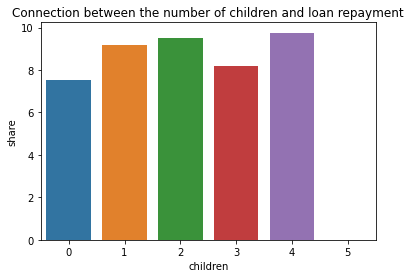

In [44]:

x=pivot_children.index.get_level_values(0) #вывожу индекс из сводной таблицы
sns.barplot(x, (pivot_children['share'])*100).set_title('Connection between the number of children and loan repayment') #для у умножаем на 100% чтобы показать %, а не долю.

*Видим, что с увеличением количества детей, вероятность невозврата кредитных средств в срок растет, тогда как с наличием 3 детей она снижается, но значение по прежнему выше чем в ситуациях, когда у заемщика детей нет.*

*Также взаимосвязь была обнаружена между семейным статусом и его влиянием на возврат кредита в срок.*

Text(0.5, 1.0, 'Connection between family status and loan repayment')

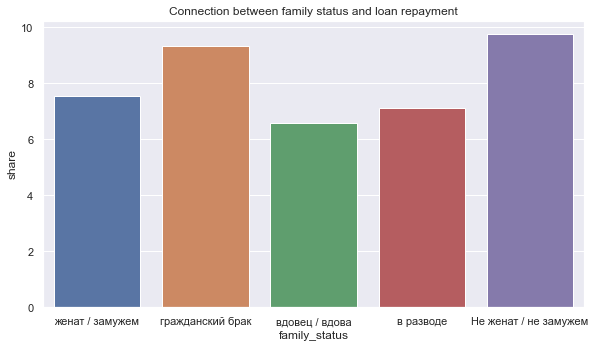

In [45]:
sns.set(rc={'figure.figsize':(9.7,5.27)}) #to fix the signatures in abscissa
#to show the persentage (*100)
sns.barplot(x=pivot_family['family_status'], y=pivot_family['share']*100).set_title('Connection between family status and loan repayment') 

*В категориях **женат / замужем , гражданский брак, Не женат / не замужем** говорят о меньшей надежности заемщика, так как говорит о наличии допущенных просрочек по кредиту, в сравнении с категориями в разводе, вдовец / вдова по которым результаты исследования показывают наименьшую долю наличия задержек с возвратом по кредиту*